Water Level=30%, Temperature=28°C
Motor Control = 100.00%  |  Heater Control = 70.00%

Water Level MFs: {'low': 0.4, 'medium': 0, 'high': 0}
Temperature MFs: {'cold': 0.2, 'warm': 0.3, 'hot': 0}
Motor Rule Strengths: {'off': 0, 'medium': 0, 'on': 0.4}
Heater Rule Strengths: {'off': 0, 'medium': 0.3, 'on': 0.2}


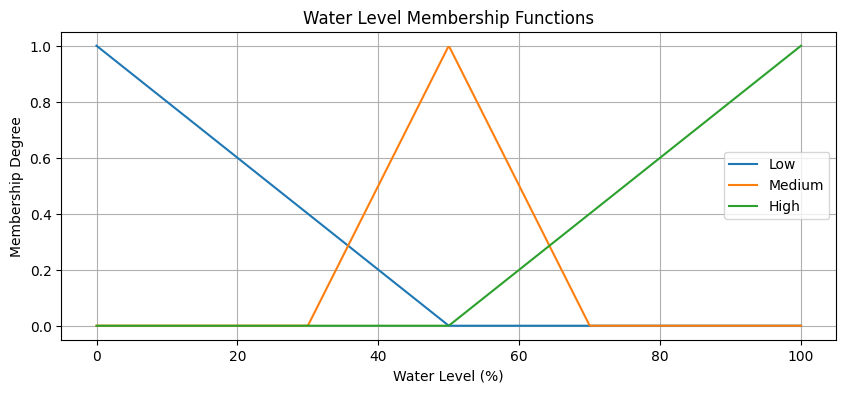

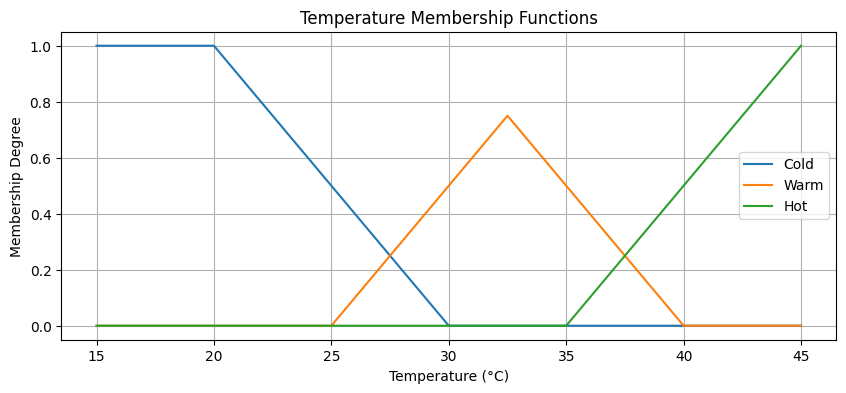

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def fuzzify_water_level(x):
    low = max(0, min(1, (50 - x) / 50)) #0.4
    medium = max(0, min((x - 30) / 20, (70 - x) / 20)) # 0
    high = max(0, min(1, (x - 50) / 50)) #0
    return {"low": round(low, 2), "medium": round(medium, 2), "high": round(high, 2)}


def fuzzify_temperature(x):
    cold = max(0, min(1, (30 - x) / 10))
    warm = max(0, min((x - 25) / 10, (40 - x) / 10))
    hot = max(0, min(1, (x - 35) / 10))
    return {"cold": round(cold, 2), "warm": round(warm, 2), "hot": round(hot, 2)}


def apply_rules(water_level, temperature):

    motor = {
        "off": water_level["high"], #0
        "medium": water_level["medium"], #0
        "on": water_level["low"] #0.4
    }
    heater = {
        "off": temperature["hot"],
        "medium": temperature["warm"],
        "on": temperature["cold"]
    }
    return motor, heater


def defuzzify(rules, step=1):
    values = {"off": 0, "medium": 50, "on": 100}
    numerator = sum(rules[key] * values[key] for key in rules) # 0 + 0 + 40 = 40
    denominator = sum(rules.values()) # 0 + 0 + 0.4 = 0.4
    return numerator / denominator if denominator != 0 else 0 # num / dem = 100


def water_tank_system(water_level_input, temperature_input):
    wl_mf = fuzzify_water_level(water_level_input)
    temp_mf = fuzzify_temperature(temperature_input)
    motor_rules, heater_rules = apply_rules(wl_mf, temp_mf)
    
    motor_val = defuzzify(motor_rules)
    heater_val = defuzzify(heater_rules)
    
    print(f"Water Level={water_level_input}%, Temperature={temperature_input}°C")
    print(f"Motor Control = {motor_val:.2f}%  |  Heater Control = {heater_val:.2f}%\n")
    print("Water Level MFs:", wl_mf)
    print("Temperature MFs:", temp_mf)
    print("Motor Rule Strengths:", motor_rules)
    print("Heater Rule Strengths:", heater_rules)
    return motor_val, heater_val


# Example test call
water_tank_system(30, 28)

def plot_membership_functions():
    x_water = np.linspace(0, 100, 500)
    low = [max(0, min(1, (50 - x) / 50)) for x in x_water]
    medium = [max(0, min((x - 30) / 20, (70 - x) / 20)) for x in x_water]
    high = [max(0, min(1, (x - 50) / 50)) for x in x_water]

    plt.figure(figsize=(10, 4))
    plt.plot(x_water, low, label='Low')
    plt.plot(x_water, medium, label='Medium')
    plt.plot(x_water, high, label='High')
    plt.title('Water Level Membership Functions')
    plt.xlabel('Water Level (%)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.savefig('water_level_membership_functions.png')
    plt.show()

    x_temp = np.linspace(15, 45, 500)
    cold = [max(0, min(1, (30 - x) / 10)) for x in x_temp]
    warm = [max(0, min((x - 25) / 10, (40 - x) / 10)) for x in x_temp]
    hot = [max(0, min(1, (x - 35) / 10)) for x in x_temp]

    plt.figure(figsize=(10, 4))
    plt.plot(x_temp, cold, label='Cold')
    plt.plot(x_temp, warm, label='Warm')
    plt.plot(x_temp, hot, label='Hot')
    plt.title('Temperature Membership Functions')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Membership Degree')
    plt.legend()
    plt.grid(True)
    plt.savefig('temperature_membership_functions.png')
    plt.show()

# To visualize, call:
plot_membership_functions()
